In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [640]:
label = 'aggregated-ns'
clabel = 'avg.'

#label = 'aggregated'
#clabel = 'avg.'

#label = 'single'
#clabel = ''

In [641]:
results = []

In [642]:
data = pd.read_csv(f'processed-{label}.csv')

In [643]:
data.columns

Index(['Unnamed: 0', 'dataset', 'k', 'acc', 'sens', 'spec', 'auc', 'best_acc',
       'best_sens', 'best_spec', 'threshold', 'best_threshold',
       'best_acc_orig', 'p', 'n', 'auc_min', 'auc_min_best', 'auc_rmin',
       'auc_rmin_best', 'auc_amin', 'auc_amin_best', 'auc_armin',
       'auc_armin_best', 'auc_max', 'auc_max_best', 'auc_amax',
       'auc_amax_best', 'auc_maxa', 'auc_maxa_best', 'acc_min', 'acc_rmin',
       'acc_max', 'acc_rmax', 'max_acc_min', 'max_acc_max', 'max_acc_rmax'],
      dtype='object')

In [644]:
def convert(x):
    try:
        return float(x)
    except:
        return None

In [645]:
data['auc_min_max'] = (data['auc_min'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_max'] = (data['auc_rmin'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_maxa'] = (data['auc_rmin'].apply(convert) + data['auc_maxa'].apply(convert)) / 2.0

data['auc_min_max_best'] = (data['auc_min_best'].apply(convert) + data['auc_max_best'].apply(convert)) / 2.0
data['auc_rmin_max_best'] = (data['auc_rmin_best'].apply(convert) + data['auc_max_best'].apply(convert)) / 2.0

data['auc_min_maxa_best'] = (data['auc_min_best'].apply(convert) + data['auc_maxa_best'].apply(convert)) / 2.0
data['auc_rmin_maxa_best'] = (data['auc_rmin_best'].apply(convert) + data['auc_maxa_best'].apply(convert)) / 2.0

data['max_acc_min_max'] = (data['max_acc_min'].apply(convert) + data['max_acc_max'].apply(convert)) / 2.0
data['max_acc_min_rmax'] = (data['max_acc_min'].apply(convert) + data['max_acc_rmax'].apply(convert)) / 2.0

In [646]:
for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

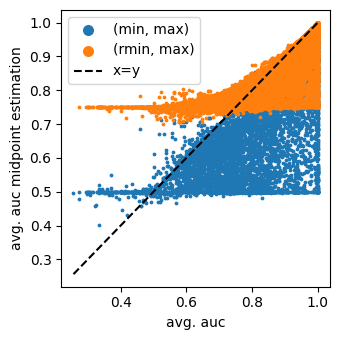

In [647]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), min(data['auc_min_max']), min(data['auc_rmin_max']))
plt.scatter(data['auc'], data['auc_min_max'], label='(min, max)', s=3)
plt.scatter(data['auc'], data['auc_rmin_max'], label='(rmin, max)', s=3)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-auc-midpoint.pdf')

In [648]:
tmp = data[['auc', 'auc_rmin_max']].dropna()
(r2_score(data['auc'], data['auc_min_max']),
r2_score(tmp['auc'], tmp['auc_rmin_max']))

(-0.0008138839362052952, 0.5577053576076464)

In [649]:
(mean_absolute_percentage_error(data['auc'], data['auc_min_max']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max']))

(np.float64(0.12433225699566366), np.float64(0.09007135976727319))

In [650]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max']), 
         np.abs(tmp['auc'] - tmp['auc_rmin_max']))

WilcoxonResult(statistic=np.float64(1928633.0), pvalue=np.float64(0.0))

In [651]:
results.append({'target': ['auc', 'auc'],
                'source': ['arbitrary fpr, tpr', 'arbitrary fpr, tpr'],
                'estimation': ['(min, max)', '(rmin, max)'],
                'r2': [r2_score(data['auc'], data['auc_min_max']),
                       r2_score(tmp['auc'], tmp['auc_rmin_max'])],
                'mape': [mean_absolute_percentage_error(data['auc'], data['auc_min_max']),
                         mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max'])]})

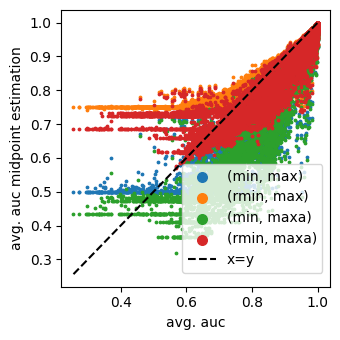

In [652]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), 
              min(data['auc_min_max_best']),
              min(data['auc_rmin_max_best']),
              min(data['auc_min_maxa_best']),
              min(data['auc_rmin_maxa_best']),
              )
plt.scatter(data['auc'], data['auc_min_max_best'], label='(min, max)', s=3)
plt.scatter(data['auc'], data['auc_rmin_max_best'], label='(rmin, max)', s=3)
plt.scatter(data['auc'], data['auc_min_maxa_best'], label='(min, maxa)', s=3)
plt.scatter(data['auc'], data['auc_rmin_maxa_best'], label='(rmin, maxa)', s=3)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4, loc=(0.45, 0.05))
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-auc-macc-midpoint.pdf')

In [653]:
tmp0 = data[['auc', 'auc_rmin_max_best']].dropna()
tmp1 = data[['auc', 'auc_min_maxa_best']].dropna()
tmp2 = data[['auc', 'auc_rmin_maxa_best']].dropna()
(r2_score(data['auc'], data['auc_min_max_best']),
r2_score(tmp0['auc'], tmp0['auc_rmin_max_best']),
r2_score(tmp1['auc'], tmp1['auc_min_maxa_best']),
r2_score(tmp2['auc'], tmp2['auc_rmin_maxa_best']))

(0.6013321551172672,
 0.6772722078779534,
 0.2236440856310249,
 0.7415562108182405)

In [654]:
(mean_absolute_percentage_error(data['auc'], data['auc_min_max_best']),
mean_absolute_percentage_error(tmp0['auc'], tmp0['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp1['auc'], tmp1['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_rmin_maxa_best']))

(np.float64(0.08540121946597458),
 np.float64(0.0813409722928719),
 np.float64(0.12306933436142012),
 np.float64(0.06888301937081791))

In [655]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max_best']), 
         np.abs(tmp['auc'] - tmp['auc_rmin_maxa_best']))

WilcoxonResult(statistic=np.float64(3277930.0), pvalue=np.float64(0.0))

In [656]:
results.append({'target': ['auc', 'auc', 'auc', 'auc'],
                'source': ['fpr, tpr at max acc.', 'fpr, tpr at max acc.', 'fpr, tpr at max acc.', 'fpr, tpr at max acc.'],
                'estimation': ['(min, max)', '(rmin, max)', '(min, maxa)', '(rmin, maxa)'],
                'r2': (r2_score(data['auc'], data['auc_min_max_best']),
r2_score(tmp0['auc'], tmp0['auc_rmin_max_best']),
r2_score(tmp1['auc'], tmp1['auc_min_maxa_best']),
r2_score(tmp2['auc'], tmp2['auc_rmin_maxa_best'])),
                'mape': (mean_absolute_percentage_error(data['auc'], data['auc_min_max_best']),
mean_absolute_percentage_error(tmp0['auc'], tmp0['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp1['auc'], tmp1['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_rmin_maxa_best']))})

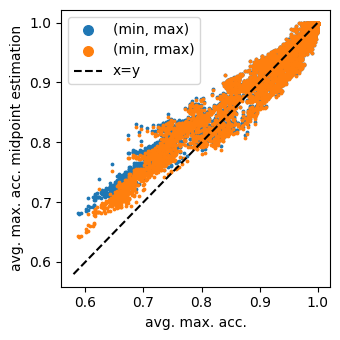

In [657]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['best_acc']), 
              min(data['max_acc_min_max']),
              min(data['max_acc_min_rmax']))
plt.scatter(data['best_acc'], data['max_acc_min_max'], label='(min, max)', s=3)
plt.scatter(data['best_acc'], data['max_acc_min_rmax'], label='(min, rmax)', s=3)
plt.xlabel(f'{clabel} max. acc.')
plt.ylabel(f'{clabel} max. acc. midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-max-acc-midpoint.pdf')

In [658]:
tmp0 = data[['best_acc', 'max_acc_min_max']].dropna()
tmp1 = data[['best_acc', 'max_acc_min_rmax']].dropna()
(r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(0.8944196326981846, 0.9164001606936467)

In [659]:
(mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(np.float64(0.031013479213606737), np.float64(0.027843963675247017))

In [660]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['best_acc'] - tmp['max_acc_min_max']), 
         np.abs(tmp['best_acc'] - tmp['max_acc_min_rmax']))

WilcoxonResult(statistic=np.float64(4898053.0), pvalue=np.float64(3.606946845628045e-147))

In [661]:
results.append({'target': ['max. acc.', 'max. acc.'],
                'source': ['auc', 'auc'],
                'estimation': ['(min, max)', '(min, rmax)'],
                'r2': (r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax'])),
                'mape': (mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))})

In [662]:
results = pd.concat([pd.DataFrame(results[0]), pd.DataFrame(results[1]), pd.DataFrame(results[2])])

In [663]:
results.to_csv(f'results-midpoints-{label}.csv', index=False)